# 第一次作业

刘衍涛 计算机学院 2022281013229071

## 第一题

比较说一下 Random Forest 与 GBDT 的共同点与区别？ 提示：从两个方法的目标函数，学习参数、预测等方面阐述

共同点： GBDT和Random Forest都是由许多决策树组成

不同点：

- GBDT当中的树都是回归树（给出具体的value），而随机森林中的树则是分类树（对数据分类至不同类别）
- GBDT中的每一颗树都建立在前一颗树的基础上，为前一颗树预测回归结果（打分结果）的修正，而随机森林的树都是相互独立的

## 第二题

### 数据集1

In [1]:
import numpy as np
from scipy.sparse import csr_matrix

row = []
col = []
for line in open('yelp.edgelist').readlines():
    x,y,_ = line.strip().split(' ')
    row.append(int(x))
    col.append(int(y))
row = np.array(row)
col = np.array(col)
data = np.array([1] * len(row))
m = len(set(row))
n = len(set(col))

sparse_matrix = csr_matrix((data,(row,col)),shape=(m,n),dtype=np.float64)

In [2]:
from scipy.sparse.linalg import svds
U,s,Vh = svds(sparse_matrix,k=10)

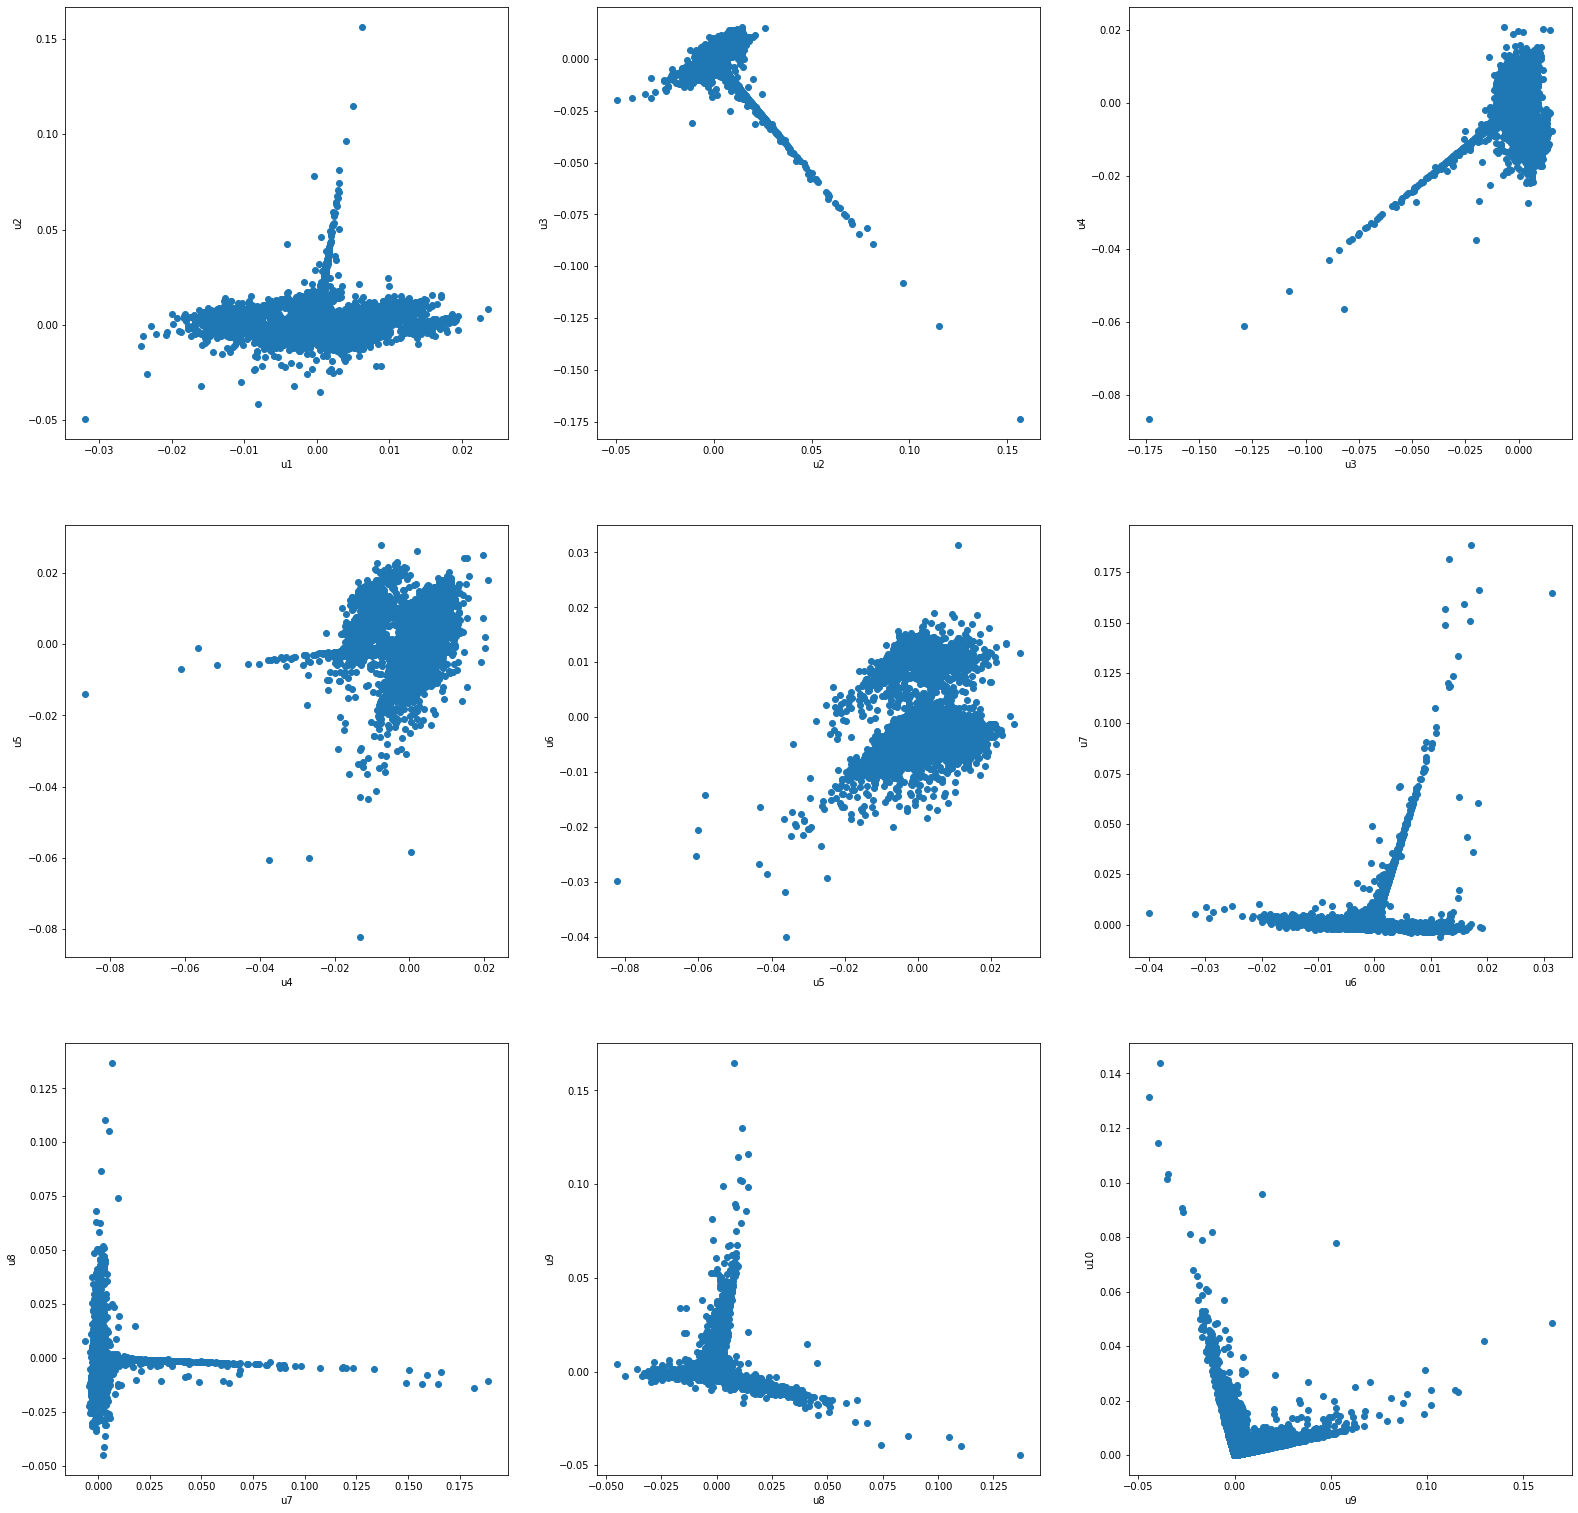

In [3]:
import matplotlib.pyplot as plt

row = 3
col = 3

fig, axs = plt.subplots(row,col,figsize=(27,27))

for i in range(9):

    axs[int(i/col),int(i%col)].scatter(U[:,i],U[:,i+1])
    
for ax,i in zip(axs.flat,range(9)):
    ax.set(xlabel=f'u{i+1}',ylabel=f'u{i+2}')



In [9]:
Vh.shape

(10, 37700)

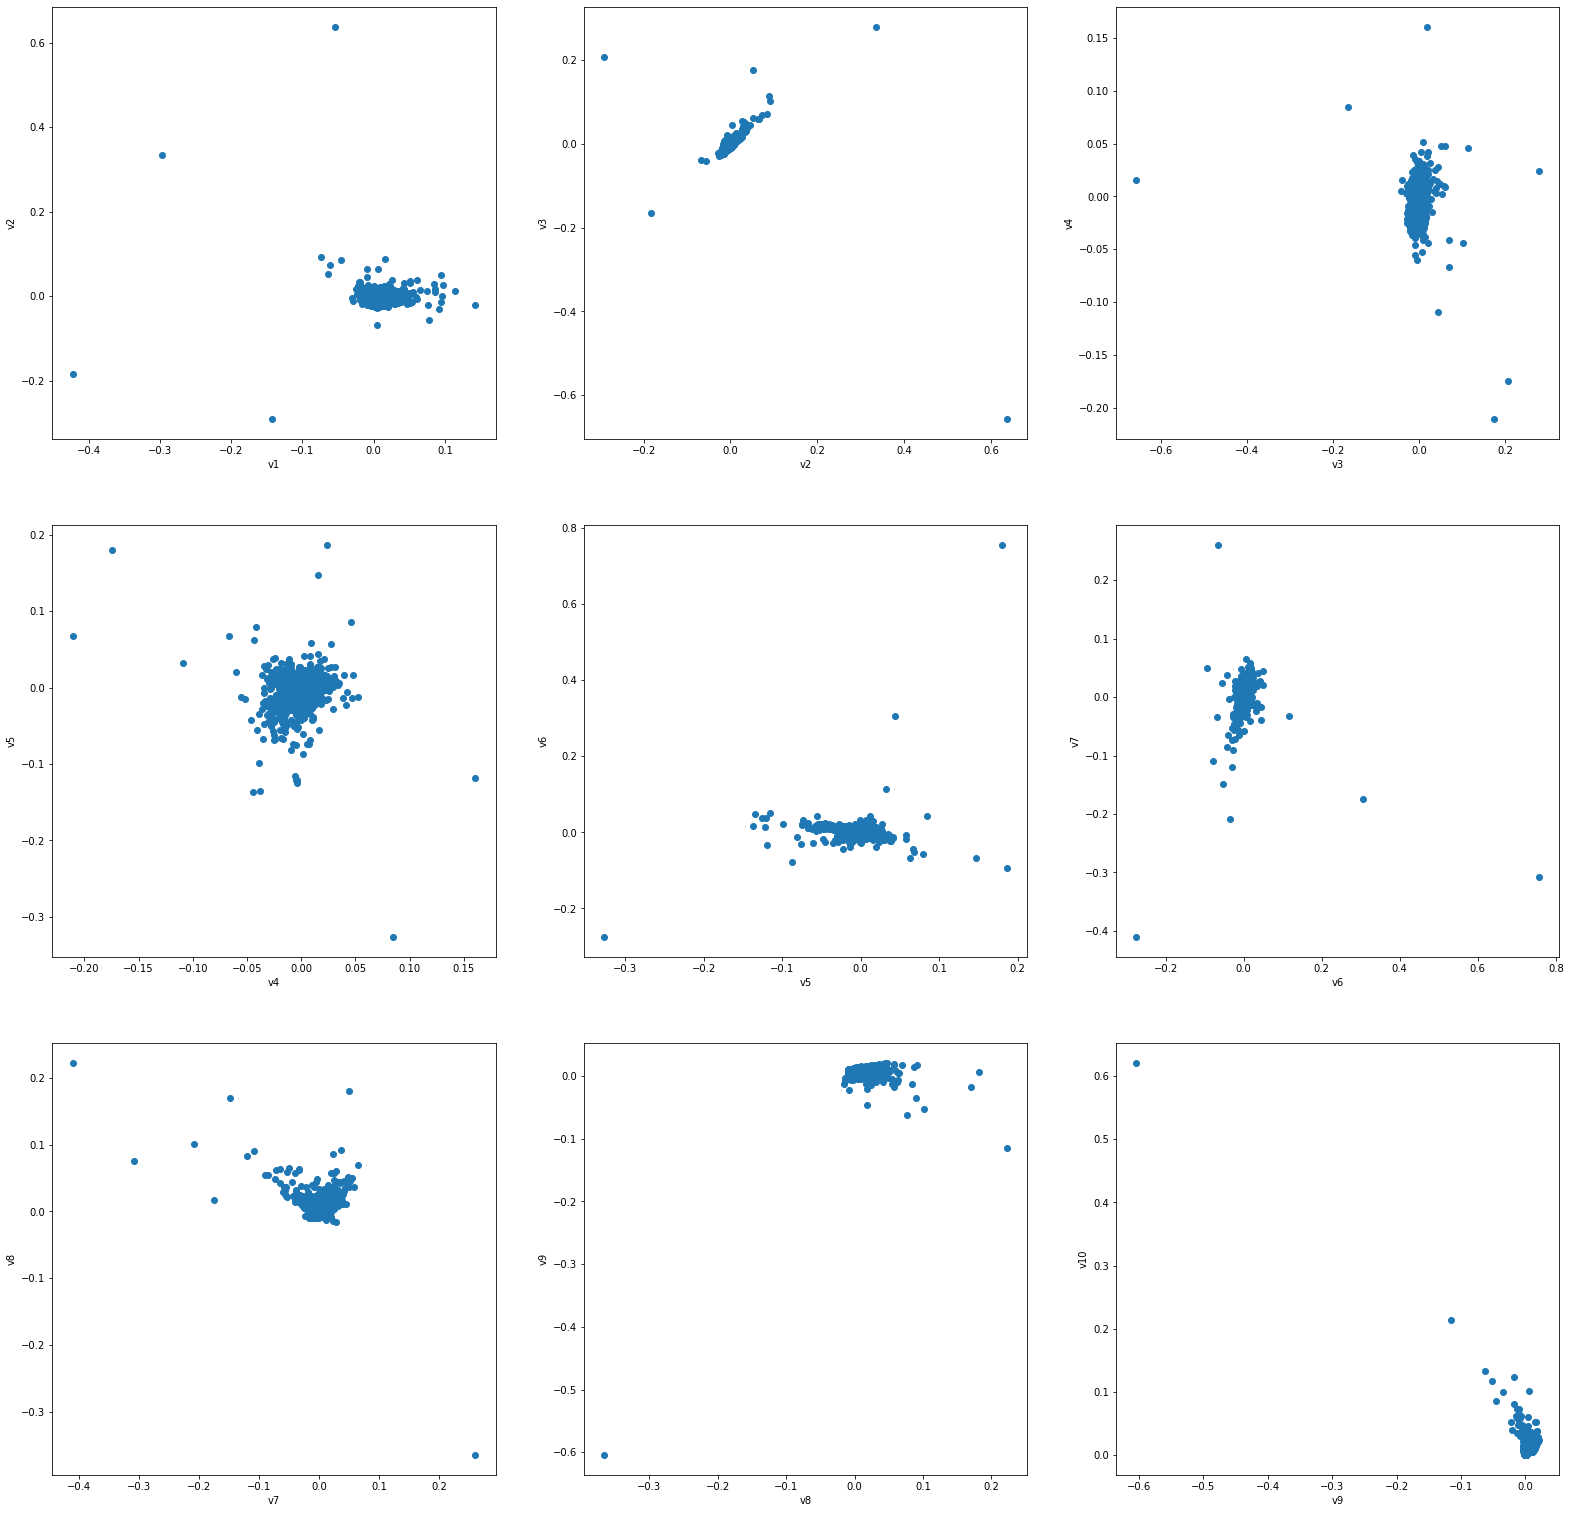

In [10]:
import matplotlib.pyplot as plt

row = 3
col = 3

fig, axs = plt.subplots(row,col,figsize=(27,27))

for i in range(9):

    axs[int(i/col),int(i%col)].scatter(Vh[i],Vh[i+1])
    
for ax,i in zip(axs.flat,range(9)):
    ax.set(xlabel=f'v{i+1}',ylabel=f'v{i+2}')

### 数据集二
url: http://snap.stanford.edu/data/github-social.html
github 开发者网络数据集

In [5]:
row = []
col = []
for line in open('git_web_ml/musae_git_edges.csv').readlines()[1:]:
    x,y = line.strip().split(',')
    row.append(int(x))
    col.append(int(y))
row = np.array(row)
col = np.array(col)
data = np.array([1] * len(row))
m = len(open('git_web_ml/musae_git_target.csv').readlines())-1
n = m
sparse_matrix = csr_matrix((data,(row,col)),shape=(m,n),dtype=np.float64)

In [6]:
from scipy.sparse.linalg import svds
U,s,Vh = svds(sparse_matrix,k=10)

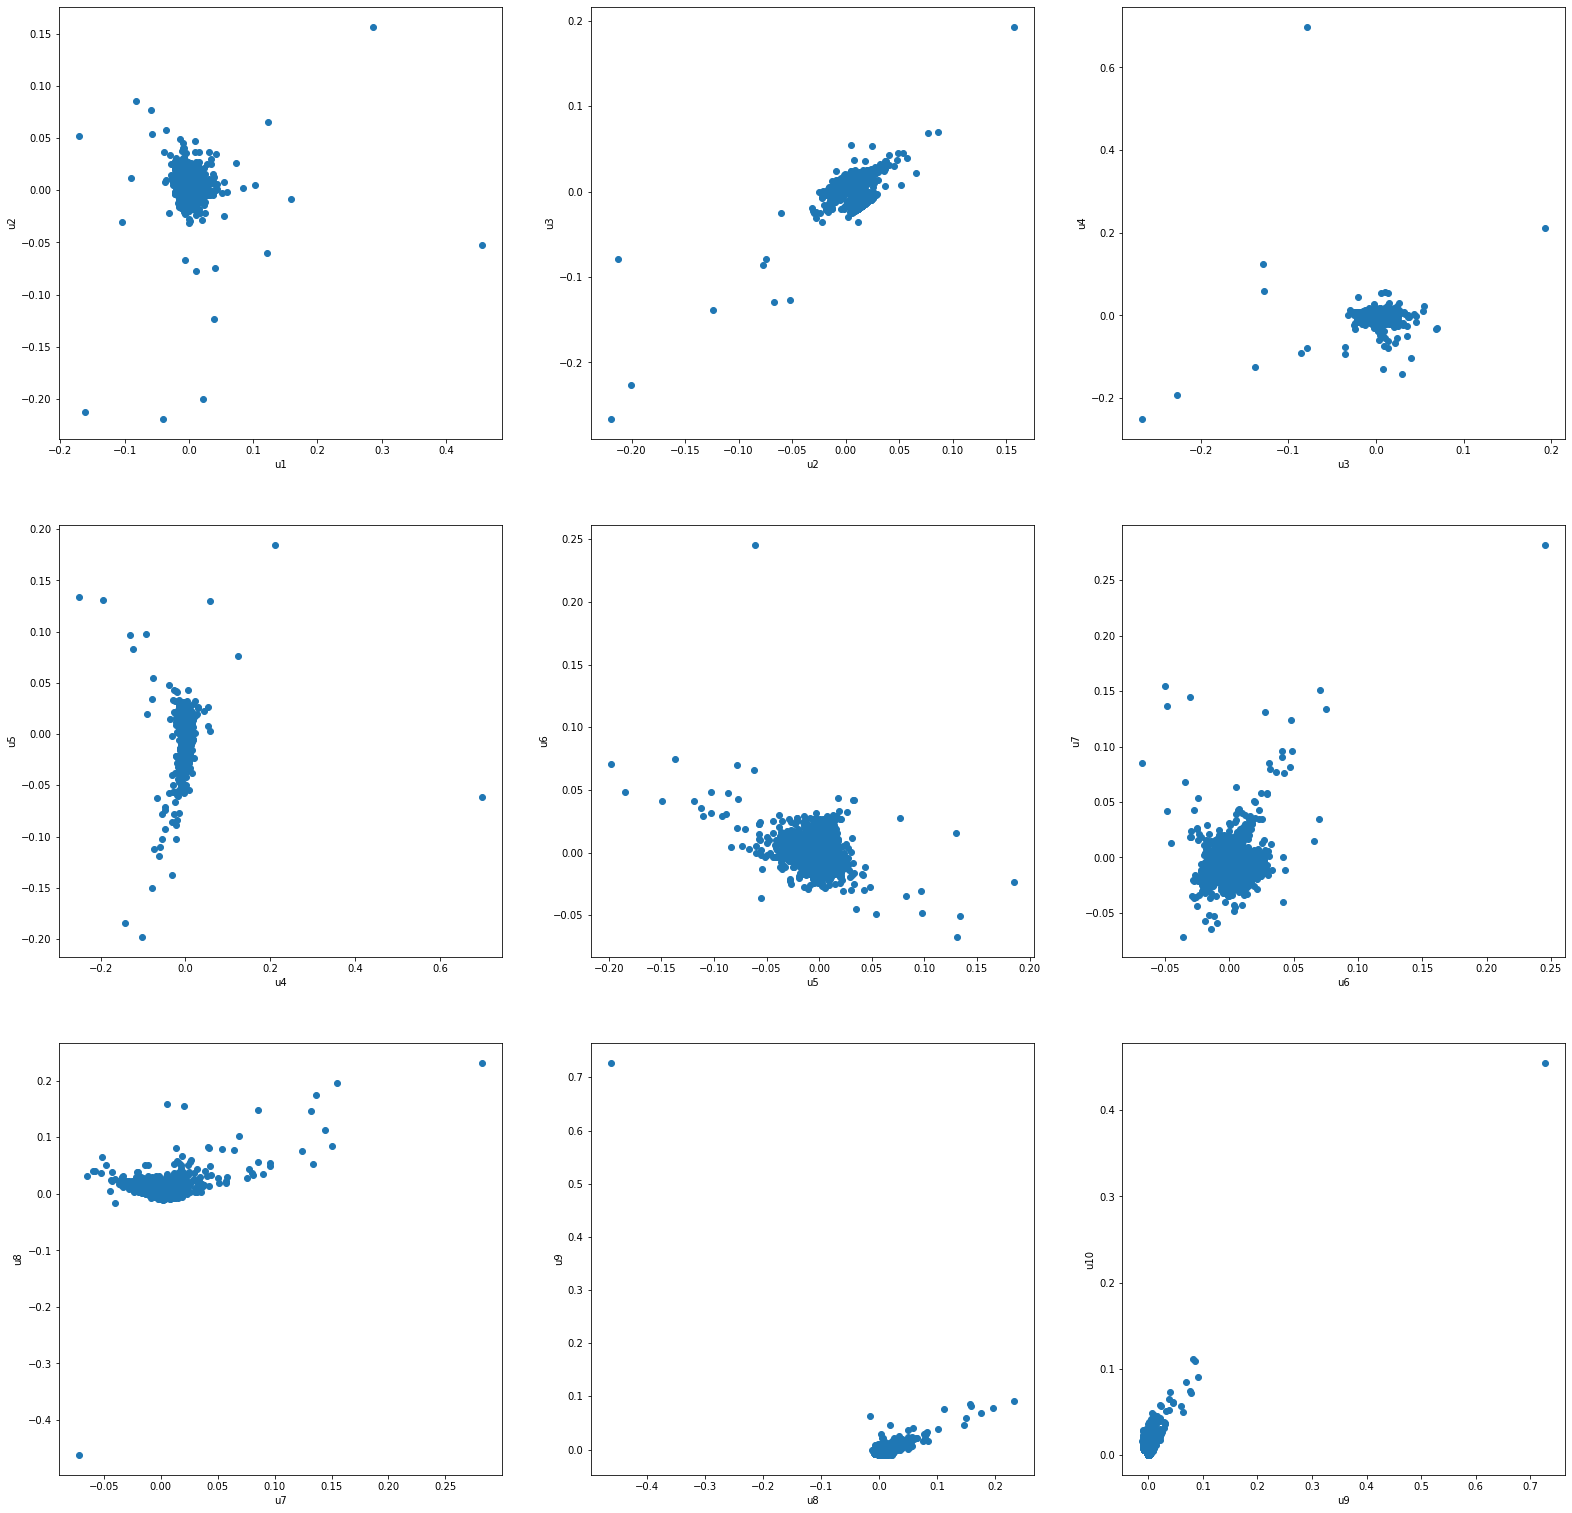

In [7]:
import matplotlib.pyplot as plt

row = 3
col = 3

fig, axs = plt.subplots(row,col,figsize=(27,27))

for i in range(9):
    axs[int(i/col),int(i%col)].scatter(U[:,i],U[:,i+1])
for ax,i in zip(axs.flat,range(9)):
    ax.set(xlabel=f'u{i+1}',ylabel=f'u{i+2}')


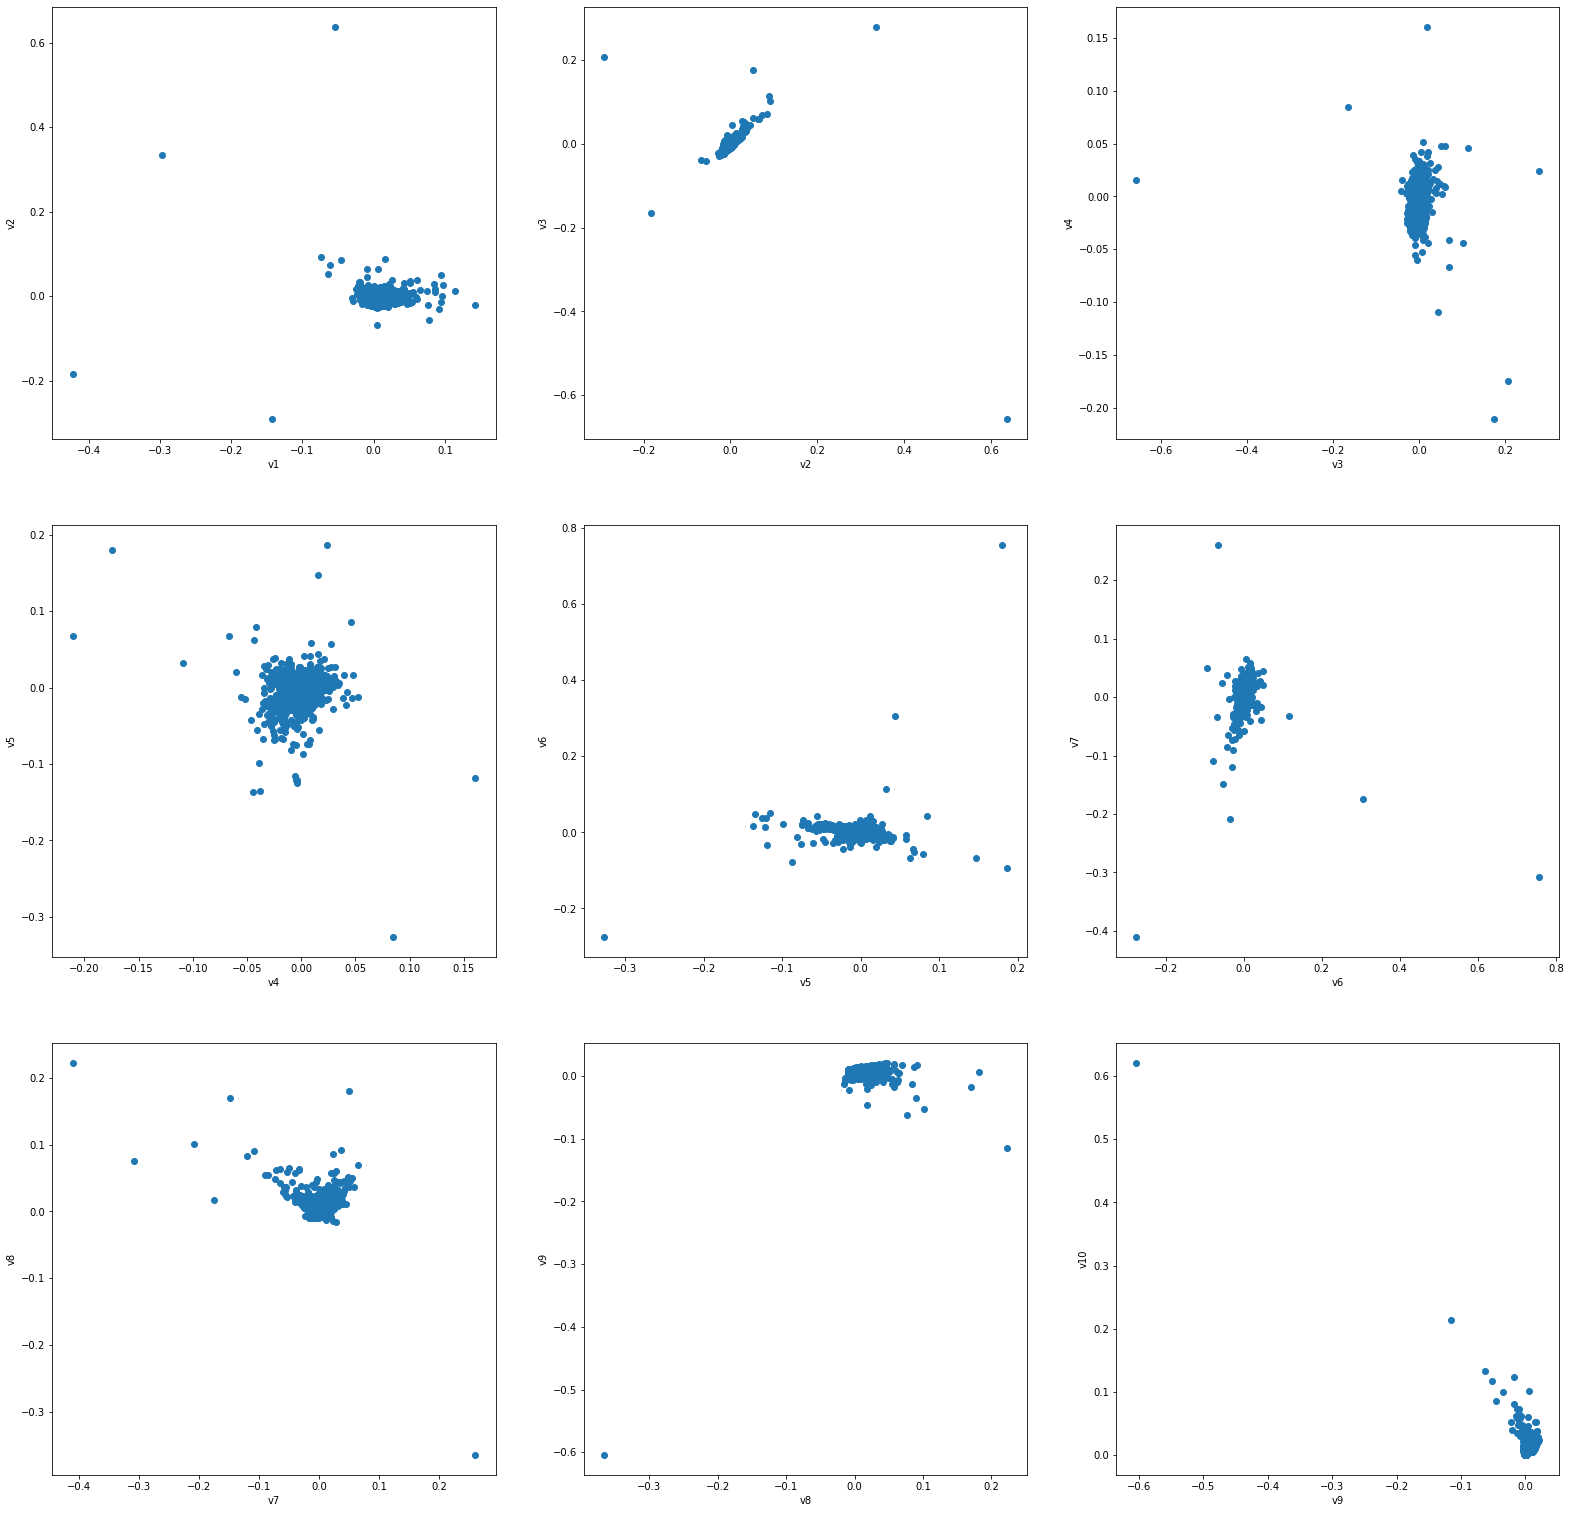

In [11]:
import matplotlib.pyplot as plt

row = 3
col = 3

fig, axs = plt.subplots(row,col,figsize=(27,27))

for i in range(9):

    axs[int(i/col),int(i%col)].scatter(Vh[i],Vh[i+1])
    
for ax,i in zip(axs.flat,range(9)):
    ax.set(xlabel=f'v{i+1}',ylabel=f'v{i+2}')

## 第三题
证明或说明为什么$U$ $\Sigma$ 中的第一列是矩阵 A 的行坐标点在第一个右奇异向量 v1 上投影
的坐标。（提示：空间中一个点 p 在向量 v1 上的投影如何表示）

**证明**

依据 SVD 的 定义我们有
$$
A = U\Sigma V^T
$$
且 $U$ 和 $V$ 都是column orthogonal的举证 即为满足 $V^TV=I$ 其中¥¥为单位矩阵
则我们有
$$
AV = U\Sigma
$$
根据向量投影的定义, 我们可以有 $Av_1 = U\Sigma_1$, 这个等式就表明了 矩阵A的每一行在$v_1$上的投影，构成了 $U\Sigma$ 矩阵的第一列

**说明**

矩阵A的某一行代表了，一个用户的对目前所有的电影的一个评分
而 $v_1$ 则表示了一个由 电影评分向量 到某一个 concept （比如科幻电影 Sci-Fi Concept） 的一个喜好，
这两个向量都同处于一个 $n$ 维空间中，那么 $A_i v_1$ 这个投影的长度，就代表着，用户 $\text{user}_i$ 对于 Sci-Fi 这个concept的喜好程度